<a href="https://colab.research.google.com/github/Vyshnavi253/Customer-Churn-Prediction/blob/main/final_Churn_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data=pd.read_csv("churn_file.csv")
data

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,24,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,72,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,11,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,4,Yes,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [ ]:
data.tail()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,24,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,72,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,11,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,4,Yes,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,66,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [ ]:
data.nunique()

customerID          7043
tenure                73
PhoneService           2
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

#### Purpose of describe function?
The describe() method is used for calculating some statistical data like percentile, mean and std of the numerical values of the Series or DataFrame.

In [ ]:
data.describe()

,tenure,MonthlyCharges
count,7043.000000,7043.000000
mean,32.371149,64.761692
std,24.559481,30.090047
min,0.000000,18.250000
25%,9.000000,35.500000
50%,29.000000,70.350000
75%,55.000000,89.850000
max,72.000000,118.750000


In [ ]:
data.dtypes

customerID           object
tenure                int64
PhoneService         object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [ ]:
data.corr()

<ipython-input-8-c44ded798807>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,tenure,MonthlyCharges
tenure,1.0000,0.2479
MonthlyCharges,0.2479,1.0000


In [ ]:
data.isna().sum()

customerID          0
tenure              0
PhoneService        0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   tenure            7043 non-null   int64  
 2   PhoneService      7043 non-null   object 
 3   Contract          7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
 8   Churn             7043 non-null   object 
dtypes: float64(1), int64(1), object(7)
memory usage: 495.3+ KB


In [ ]:
data["PhoneService"].value_counts()

Yes    6361
No      682
Name: PhoneService, dtype: int64

In [ ]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
data["PhoneService"] = label_encoder.fit_transform(data["PhoneService"])
data["Contract"] = label_encoder.fit_transform(data["Contract"])
data["PaperlessBilling"] = label_encoder.fit_transform(data["PaperlessBilling"])
data["PaymentMethod"] = label_encoder.fit_transform(data["PaymentMethod"])
data["Churn"] = label_encoder.fit_transform(data["Churn"])
data.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,0,0,1,2,29.85,29.85,0
1,5575-GNVDE,34,1,1,0,3,56.95,1889.5,0
2,3668-QPYBK,2,1,0,1,3,53.85,108.15,1
3,7795-CFOCW,45,0,1,0,0,42.30,1840.75,0
4,9237-HQITU,2,1,0,1,2,70.70,151.65,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   tenure            7043 non-null   int64  
 2   PhoneService      7043 non-null   int64  
 3   Contract          7043 non-null   int64  
 4   PaperlessBilling  7043 non-null   int64  
 5   PaymentMethod     7043 non-null   int64  
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
 8   Churn             7043 non-null   int64  
dtypes: float64(1), int64(6), object(2)
memory usage: 495.3+ KB


In [ ]:
data["TotalCharges"] = pd.to_numeric(data['TotalCharges'],errors = 'coerce')

In [ ]:
data.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,0,0,1,2,29.85,29.85,0
1,5575-GNVDE,34,1,1,0,3,56.95,1889.50,0
2,3668-QPYBK,2,1,0,1,3,53.85,108.15,1
3,7795-CFOCW,45,0,1,0,0,42.30,1840.75,0
4,9237-HQITU,2,1,0,1,2,70.70,151.65,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   tenure            7043 non-null   int64  
 2   PhoneService      7043 non-null   int64  
 3   Contract          7043 non-null   int64  
 4   PaperlessBilling  7043 non-null   int64  
 5   PaymentMethod     7043 non-null   int64  
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7032 non-null   float64
 8   Churn             7043 non-null   int64  
dtypes: float64(2), int64(6), object(1)
memory usage: 495.3+ KB


#### In modelling customer_id is not required to consider bcz it's randomly generated number so just remove this column

In [ ]:
data['customerID'] = pd.to_numeric(data['customerID'], errors='coerce')
data = data.replace(np.nan, 0, regex=True)
print(data)
print(data.dtypes)

      customerID  tenure  PhoneService  Contract  PaperlessBilling  \
0            0.0       1             0         0                 1   
1            0.0      34             1         1                 0   
2            0.0       2             1         0                 1   
3            0.0      45             0         1                 0   
4            0.0       2             1         0                 1   
...          ...     ...           ...       ...               ...   
7038         0.0      24             1         1                 1   
7039         0.0      72             1         1                 1   
7040         0.0      11             0         0                 1   
7041         0.0       4             1         0                 1   
7042         0.0      66             1         2                 1   

      PaymentMethod  MonthlyCharges  TotalCharges  Churn  
0                 2           29.85         29.85      0  
1                 3           56.95      

#### Tenure column is not consideed in modelling why?

In [ ]:
x = data.iloc[:,2:-1].values
y = data.iloc[:,-1].values
# data.iloc[:,2:-1]

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size = 0.2,random_state=0)

In [ ]:
from sklearn.preprocessing import StandardScaler

sc_x = StandardScaler()
X_train = sc_x.fit_transform(X_train)
X_test = sc_x.transform(X_test)

**Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
model_2=LogisticRegression(random_state=0)
model_2.fit(X_train,Y_train)

LogisticRegression(random_state=0)

In [ ]:
y_pred_2=model_2.predict(X_test)
y_pred_2

array([0, 0, 1, ..., 0, 0, 0])

In [ ]:
ac_2=accuracy_score(y_pred_2,Y_test)
ac_2

0.7806955287437899

In [ ]:
cm_2=confusion_matrix(Y_test,y_pred_2)
cm_2

array([[927, 114],
       [195, 173]])

<Axes: >

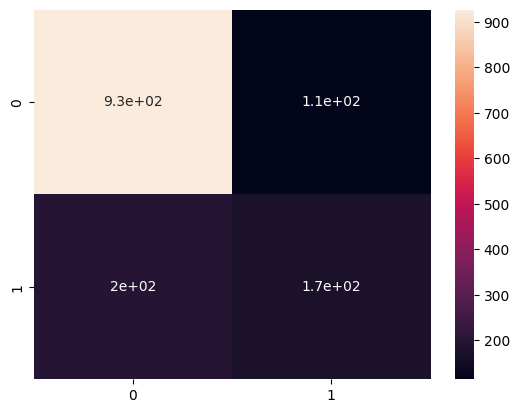

In [ ]:
sns.heatmap(cm_2,annot=True)

In [ ]:
 from sklearn.svm import SVC
 model_6=SVC(degree=3)
 model_6.fit(X_train,Y_train)

SVC()

In [ ]:
y_pred_6=model_6.predict(X_test)
y_pred_6

array([0, 0, 1, ..., 0, 0, 0])

In [ ]:
ac_6=accuracy_score(y_pred_6,Y_test)
ac_6

0.7849538679914834

In [ ]:
cm_6=confusion_matrix(Y_test,y_pred_6)
cm_6

array([[951,  90],
       [213, 155]])

**K Nearest Neighbor Classification**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model_7=KNeighborsClassifier(n_neighbors=5)
model_7.fit(X_train,Y_train)

KNeighborsClassifier()

In [ ]:
y_pred_7=model_7.predict(X_test)
y_pred_7


array([0, 0, 0, ..., 0, 0, 1])

In [ ]:
ac_7=accuracy_score(y_pred_7,Y_test)
ac_7

0.7750177430801988

In [ ]:
cm_7=confusion_matrix(Y_test,y_pred_7)
cm_7

array([[907, 134],
       [183, 185]])

**Gaussian Navie Bayes**

In [ ]:
from sklearn.naive_bayes import GaussianNB
model_8=GaussianNB()
model_8.fit(X_train,Y_train)

GaussianNB()

In [ ]:
y_pred_8=model_8.predict(X_test)
y_pred_8

array([0, 0, 1, ..., 0, 1, 1])

In [ ]:
ac_8=accuracy_score(y_pred_8,Y_test)
ac_8

0.7210787792760823

In [ ]:
cm_8=confusion_matrix(Y_test,y_pred_8)
cm_8

array([[776, 265],
       [128, 240]])

**Decision Tree Classification**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model_9=DecisionTreeClassifier(random_state=0)
model_9.fit(X_train,Y_train)

DecisionTreeClassifier(random_state=0)

[Text(0.6248030498541695, 0.9807692307692307, 'x[1] <= -0.222\ngini = 0.391\nsamples = 5634\nvalue = [4133, 1501]'),
 Text(0.34471800572041544, 0.9423076923076923, 'x[4] <= 0.126\ngini = 0.49\nsamples = 3113\nvalue = [1772, 1341]'),
 Text(0.1540536958109084, 0.9038461538461539, 'x[5] <= -0.908\ngini = 0.418\nsamples = 1313\nvalue = [923, 390]'),
 Text(0.07071732861315305, 0.8653846153846154, 'x[4] <= -1.462\ngini = 0.484\nsamples = 615\nvalue = [362, 253]'),
 Text(0.03877330007876083, 0.8269230769230769, 'x[5] <= -0.991\ngini = 0.381\nsamples = 266\nvalue = [198, 68]'),
 Text(0.02188894723024416, 0.7884615384615384, 'x[4] <= -1.489\ngini = 0.472\nsamples = 123\nvalue = [76, 47]'),
 Text(0.00820425308479916, 0.75, 'x[3] <= -0.074\ngini = 0.429\nsamples = 77\nvalue = [53, 24]'),
 Text(0.002100288789708585, 0.7115384615384616, 'x[4] <= -1.494\ngini = 0.165\nsamples = 11\nvalue = [10, 1]'),
 Text(0.0010501443948542925, 0.6730769230769231, 'gini = 0.0\nsamples = 9\nvalue = [9, 0]'),
 Text(0

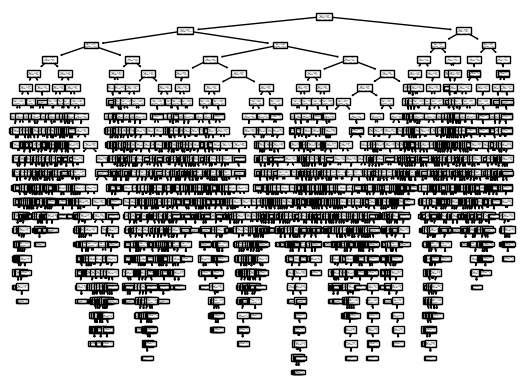

In [ ]:
from sklearn import tree
tree.plot_tree(model_9)

In [ ]:
y_pred_9=model_9.predict(X_test)
y_pred_9

array([0, 0, 1, ..., 1, 0, 1])

In [ ]:
ac_9=accuracy_score(y_pred_9,Y_test)
ac_9

0.7274662881476224

In [ ]:
cm_9=confusion_matrix(Y_test,y_pred_9)
cm_9

array([[846, 195],
       [189, 179]])

<Axes: >

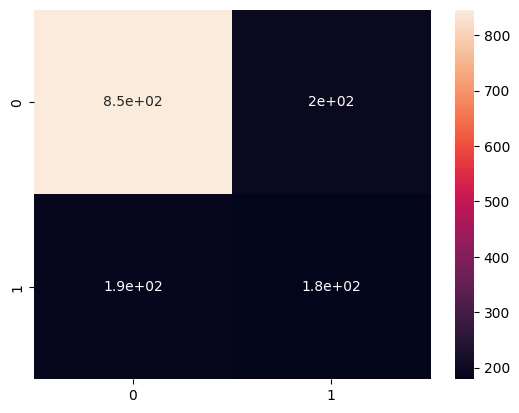

In [ ]:
sns.heatmap(cm_9,annot=True)

**RandomForest Classification**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model_10=RandomForestClassifier(n_estimators=15)
model_10.fit(X_train,Y_train)

RandomForestClassifier(n_estimators=15)

In [ ]:
y_pred_10=model_10.predict(X_test)
y_pred_10

array([0, 0, 0, ..., 1, 0, 1])

In [ ]:
ac_10=accuracy_score(y_pred_10,Y_test)
ac_10

0.772888573456352

In [ ]:
cm_10=confusion_matrix(Y_test,y_pred_10)
cm_10

array([[912, 129],
       [191, 177]])